In [1]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
import pytz
%matplotlib inline
from astroplan import Observer, FixedTarget
from astropy.utils.iers import conf
conf.auto_max_age = None
from astroplan import download_IERS_A 
from astropy.coordinates import get_sun, get_moon, get_body
from astroplan import moon_illumination

In [2]:
now=Time.now()
now=now
now

<Time object: scale='utc' format='datetime' value=2022-03-10 11:53:15.274510>

In [3]:
download_IERS_A()

In [4]:
# Setting up our Observatory
longitude='73d48m53s'
latitude='18d31m7s'
elevation= 560 * u.m 
location=EarthLocation(longitude,latitude,elevation)

ioMIT=Observer(location=location,timezone='Asia/Kolkata',
               name='MIT-Telescope',description="GSO-Newtonian Telescope MIT World Peace University")

ioMIT

<Observer: name='MIT-Telescope',
    location (lon, lat, el)=(73.81472222222222 deg, 18.518611111111117 deg, 559.9999999994782 m),
    timezone=<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>>

In [5]:
#Calculating the sunset, midnight and sunrise times for our observatory 

sunset_ioMIT=ioMIT.sun_set_time(now,which='nearest')
even_twilight_ioMIT=ioMIT.twilight_evening_astronomical(now,which='nearest')
midnight_ioMIT=ioMIT.midnight(now,which='next')
morning_twilight_ioMIT=ioMIT.twilight_morning_astronomical(now,which='next')
sunrise_IOMIT=ioMIT.sun_rise_time(now,which='next')


/home/aaron/anaconda3/lib/python3.9/site-packages/astropy/time/utils.py:179: RuntimeWarning: overflow encountered in double_scalars
  c = 134217729. * a  # 2**27+1.
/home/aaron/anaconda3/lib/python3.9/site-packages/astropy/time/utils.py:181: RuntimeWarning: invalid value encountered in double_scalars
  ah = c - abig


In [6]:
time_available=(morning_twilight_ioMIT-even_twilight_ioMIT).to(u.h)
time_available

<Quantity 9.63970644 h>

In [7]:
local_siderial_time=ioMIT.local_sidereal_time(now)

In [8]:
target=FixedTarget.from_name('m51')
coordinates=target.coord

In [9]:
moon=get_moon(now)
moon

<SkyCoord (GCRS: obstime=2022-03-10 11:53:15.274510, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km)
    (79.03671294, 25.25944591, 404126.41122894)>

In [10]:
ioMIT.target_is_up(now,target)

False

In [11]:
ist=now+5*u.h+30*u.min
ist

<Time object: scale='utc' format='datetime' value=2022-03-10 17:23:15.274510>

In [12]:
target_availability=[]
time=[]
for i in range(0,20):
    time_now=now+i*u.h
    target_availability.append(ioMIT.target_is_up(time_now.to_value('iso'),target))
    time.append(time_now)

In [13]:
time

[<Time object: scale='utc' format='datetime' value=2022-03-10 11:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 12:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 13:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 14:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 15:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 16:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 17:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 18:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 19:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 20:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 21:53:15.274510>,
 <Time object: scale='utc' format='datetime' value=2022-03-10 22:53:15.274510>,
 <Time object: scale='utc' format='datet

In [14]:
time_table=[]
for i in time:
    time_table.append(i.to_value('iso'))

In [15]:
# airmass at the specified timings
airmass=[]
for i in time:
    airmass_now=ioMIT.altaz(i,target)
    airmass_now=airmass_now.altaz
    airmass.append(airmass_now.secz)
airmass

[<Quantity -3.58023323>,
 <Quantity -6.26474217>,
 <Quantity -76.55912704>,
 <Quantity 6.65197529>,
 <Quantity 3.13126125>,
 <Quantity 2.072784>,
 <Quantity 1.5913296>,
 <Quantity 1.33824737>,
 <Quantity 1.20362721>,
 <Quantity 1.14494191>,
 <Quantity 1.1466808>,
 <Quantity 1.20927861>,
 <Quantity 1.34939838>,
 <Quantity 1.61196456>,
 <Quantity 2.1138054>,
 <Quantity 3.23288868>,
 <Quantity 7.12742243>,
 <Quantity -44.65961396>,
 <Quantity -5.9660327>,
 <Quantity -3.50363297>]

In [16]:
from astropy.table import QTable

In [17]:
a=np.array(time_table)
b=np.array(target_availability)
c=np.array(airmass)

In [18]:
t=QTable([a,b,c],names=['Time (UTC)','Visibility of m51','Airmass'])

In [19]:
t

Time (UTC),Visibility of m51,Airmass
str23,bool,float64
2022-03-10 11:53:15.275,False,-3.5802332332446847
2022-03-10 12:53:15.275,False,-6.264742173365685
2022-03-10 13:53:15.275,False,-76.55912704471426
2022-03-10 14:53:15.275,True,6.6519752890799895
2022-03-10 15:53:15.275,True,3.1312612469974686
2022-03-10 16:53:15.275,True,2.072783995465948
2022-03-10 17:53:15.275,True,1.5913295951199005
2022-03-10 18:53:15.275,True,1.3382473652357454
2022-03-10 19:53:15.275,True,1.2036272146343756


/home/aaron/anaconda3/lib/python3.9/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


(10.0, 0.5)

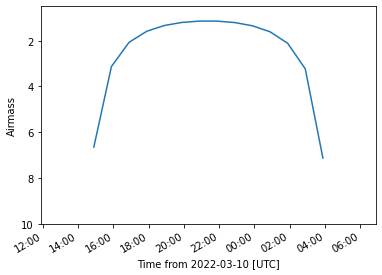

In [24]:
from astroplan.plots import plot_airmass,plot_sky
import matplotlib.pyplot as plt

plot_airmass(target, ioMIT, time_table)
plt.ylim(10,0.5)

In [25]:
t_start=time[0]
t_end=time[len(time)-1]

/home/aaron/anaconda3/lib/python3.9/site-packages/astroplan/plots/sky.py:120: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


<PolarAxesSubplot:>

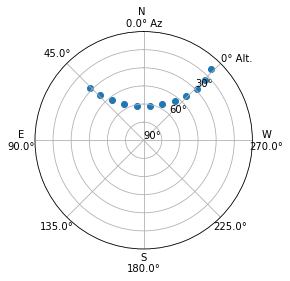

In [26]:
t_observe=t_start-(t_end-t_start)*np.linspace(0.0,1.0,20)
plot_sky(target,ioMIT,t_observe)